In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams


%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.drop(['customerID'], axis=1, inplace=True)

# Target

In [6]:
data['Churn'].value_counts(sort = False)

Yes    1869
No     5174
Name: Churn, dtype: int64

# Распределение таргета на диаграмме

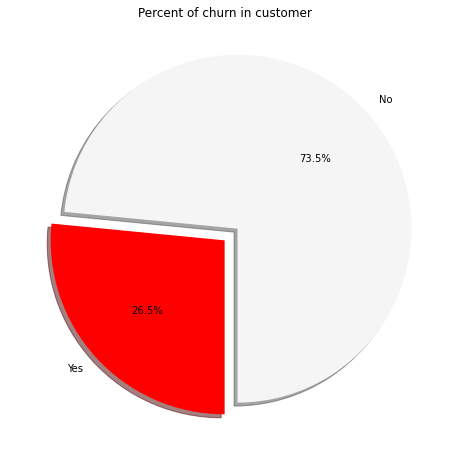

In [7]:
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [8]:
np.unique(data['Churn'])

array(['No', 'Yes'], dtype=object)

### в изначальной таблице тип object -> str()

In [9]:
data['Churn'] = [1 if str(x) == 'Yes' else 0 for x in data['Churn']]

np.unique(data['Churn'])

array([0, 1], dtype=int64)

### сколько переменных отсутствует

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Churn,0,0.0
TotalCharges,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


In [11]:
data['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [12]:
data = pd.get_dummies(data=data, columns=['gender'])

In [13]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [15]:
data['Partner'] = data['Partner'].map(lambda s :1  if str(s) =='Yes' else 0)

In [16]:
data['Dependents'] = data['Dependents'].map(lambda s :1  if str(s) =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if str(s) =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if str(s) =='Yes' else 0)

In [17]:
data['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [19]:
data[(data["Churn"] == 0) ].shape

(5174, 21)

In [20]:
data[(data["Churn"] == 1) ].shape

(1869, 21)

In [21]:
data.tenure[(data["Churn"] == 0) ]

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5174, dtype: int64

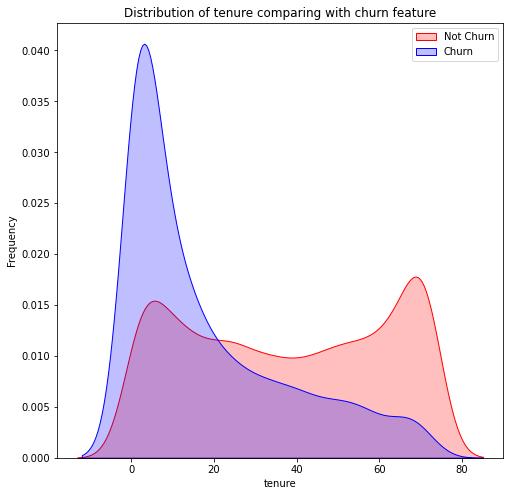

In [22]:
# tenure distibution 
g = sns.kdeplot(data.tenure[(data["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

In [23]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [24]:
data['MultipleLines'].replace('No phone service', 'No', inplace=True)

data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if str(s) =='Yes' else 0)

data['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [25]:
np.unique(data['InternetService'])

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if str(s) =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if str(s) =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if str(s) =='DSL' else 0)

In [27]:
print(data['Has_InternetService'].value_counts())
print()
print(data['Fiber_optic'].value_counts())
print()
print(data['DSL'].value_counts())

1    5517
0    1526
Name: Has_InternetService, dtype: int64

0    3947
1    3096
Name: Fiber_optic, dtype: int64

0    4622
1    2421
Name: DSL, dtype: int64


In [28]:
data.drop(['InternetService'], axis=1, inplace=True)

In [29]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if str(s) =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if str(s) =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if str(s) =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if str(s) =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if str(s) =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if str(s) =='Yes' else 0)

In [30]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [31]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,gender_Female,gender_Male,Has_InternetService,Fiber_optic,DSL,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,1,0,1,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,0,1,1,0,1,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,1,1,0,1,1,0,0,0,1,0


In [32]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [33]:
data = pd.get_dummies(data=data, columns=['Contract'])

In [34]:
data['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

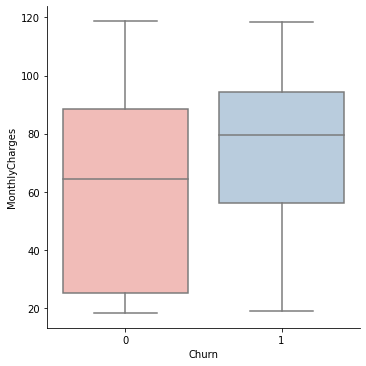

In [35]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

In [36]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [37]:
len(data[data['TotalCharges'] == " "])

11

In [38]:
data = data[data['TotalCharges'] != " "]

In [39]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

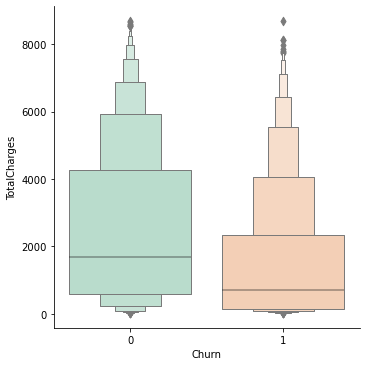

In [40]:
g = sns.factorplot(y="TotalCharges",x="Churn",data=data,kind="boxen", palette = "Pastel2")

In [41]:
data["Churn"] = data["Churn"].astype(int)

Y_train = data["Churn"]
X_train = data.drop(labels = ["Churn"],axis = 1)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, Y_train)

RandomForestClassifier(random_state=15)

In [46]:
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=10) # 10-Fold cross validation
print(clf_score)
clf_score.mean()

[0.79829545 0.80539773 0.79374111 0.79516358 0.77809388 0.74964438
 0.80938834 0.79374111 0.80227596 0.80227596]


0.7928017506142506

# Нахождение оптимальных гиперпараметров с помощью GridSearchCV

In [47]:
%%time
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train, Y_train)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))


Best parameters 
{'class_weight': {1: 1.5}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
Wall time: 1min 57s


# Классификатор с лучшими параметрами

In [48]:
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight={1: 1.5}, max_depth=3, max_features='log2',
                       n_estimators=500, random_state=15)

# Кросс-валидация rf классификатора с 10 "шагами"

In [49]:
clf_score = cross_val_score(rf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79971591 0.81676136 0.80654339 0.81507824 0.78093883 0.79658606
 0.81365576 0.79658606 0.79089616 0.80369844]


0.8020460203025992

### с новыми гиперпараметрами модель стала немного лучше

# 

# Значимость фичей

In [50]:
Rfclf_fea = pd.DataFrame(rf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

,0,Feature
24,0.212571,Contract_Month-to-month
3,0.157862,tenure
26,0.119943,Contract_Two year
18,0.103963,Fiber_optic
22,0.079805,PaymentMethod_Electronic check


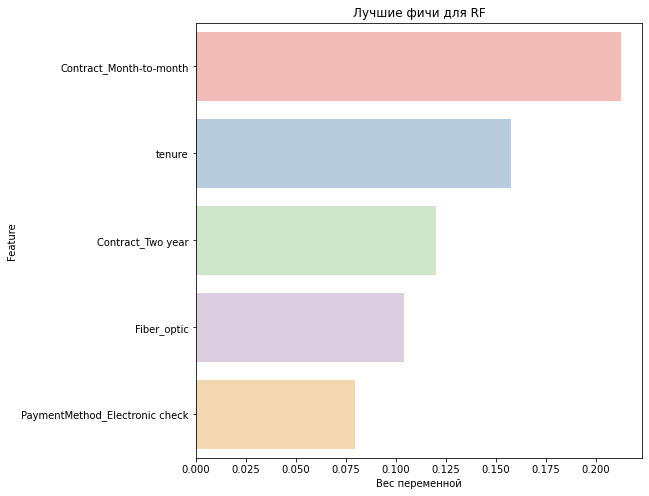

In [51]:
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Вес переменной")
g = g.set_title("Лучшие фичи для RF")

# Матрица неточностей

In [53]:
# Ячейки таблицы заполняются количеством прогнозов классификатора. 
# Правильные прогнозы идут по диагонали от верхнего левого угла в нижний правый.

# TP FP
# FN TN

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_train)

print(confusion_matrix(Y_train, y_pred))

[[4638  525]
 [ 848 1021]]


# Метрики на основе анализа и матрицы неточностей

In [56]:
from sklearn.metrics import classification_report

print(classification_report( Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.55      0.60      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.72      0.73      7032
weighted avg       0.80      0.80      0.80      7032

